<a href="https://colab.research.google.com/github/patrick251s/MachineLearning/blob/main/naiwnyBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
+----------------+---------------------+
| Y tests values | Y prediction values |
+----------------+---------------------+
|      kama      |         kama        |
|      rosa      |         rosa        |
|    canadian    |       canadian      |
|      rosa      |         rosa        |
|      rosa      |         rosa        |
|    canadian    |       canadian      |
|      rosa      |         rosa        |
|      kama      |         kama        |
|      kama      |         kama        |
|      kama      |         kama        |
|  !!! kama !!!  |   !!! canadian !!!  |
|  !!! kama !!!  |   !!! canadian !!!  |
|      rosa      |         rosa        |
|      rosa      |         rosa        |
|      kama      |         kama        |
|      kama      |         kama        |
|    canadian    |       canadian      |
|    canadian    |       canadian      |
|    canadian    |      

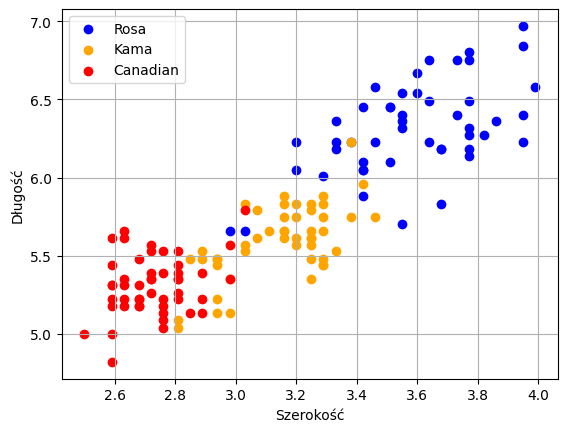

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd as xd
from google.colab import files
from google.colab import drive
from prettytable import PrettyTable

drive.mount('/gdrive')
myCsvFile = 'grains.csv'
dir_Path = '/gdrive/My Drive/MojeStudia/Semestr VIII/PiPAN/Analiza danych/'
csvKama = 'kama.csv'
csvRosa = 'rosa.csv'
csvCanadian = 'canadian.csv'

# Bayes classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

rosaDF = pd.read_csv(dir_Path+csvRosa)
canadianDF = pd.read_csv(dir_Path+csvCanadian)
kamaDF = pd.read_csv(dir_Path+csvKama)
df = pd.read_csv(dir_Path+myCsvFile)

df_temp = df
X = df_temp.drop(['group', 'compactness', 'area', 'perimeter'], axis=1)
Y = df.group.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)
method = GaussianNB()
method.fit(x_train, y_train)

y_pred = method.predict(x_test)

myTable = PrettyTable(["Y tests values", "Y prediction values"])
for i in range(len(y_test)):
  if(y_test[i] != y_pred[i]):
    myTable.add_row(["!!! "+y_test[i]+" !!!", "!!! "+y_pred[i]+" !!!"])
  else:
    myTable.add_row([y_test[i], y_pred[i]])
print(myTable, "\n")

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy = ", accuracy)
mtr = metrics.confusion_matrix(y_test, y_pred)
print(mtr, "\n")

plt.scatter(rosaDF['width'], rosaDF['length'], c = 'blue', label = "Rosa")
plt.scatter(kamaDF['width'], kamaDF['length'], c = 'orange', label = "Kama")
plt.scatter(canadianDF['width'], canadianDF['length'], c = 'red', label = "Canadian")
plt.xlabel("Szerokość")
plt.ylabel("Długość")
plt.grid(True)
plt.legend()
